___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [1]:
pwd

'C:\\Users\\Jae-EunPark\\PycharmProjects\\SM\\TF2\\05-RNNs'

In [2]:
# CODE HERE
import numpy as np
import seaborn as sns
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [3]:
df_data = pd.read_csv('../DATA/Frozen_Dessert_Production.csv')

In [4]:
df_data.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


**Task: Change the column name to Production**

In [5]:
#CODE HERE

In [6]:
df_data.DATE=pd.to_datetime(df_data.DATE)

In [7]:
df_data = df_data.set_index('DATE')

In [8]:
df_data.columns=['production']

<Axes: xlabel='DATE'>

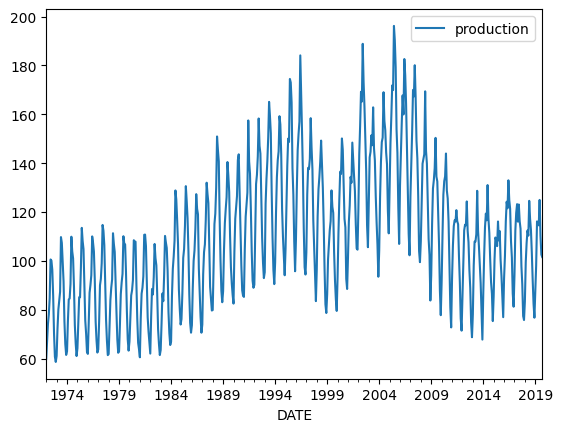

In [9]:
df_data.plot()

**TASK: Plot out the time series**

In [10]:
#CODE HERE

## Train Test Split

**TASK: Figure out the length of the data set**

In [11]:
#CODE HERE

In [12]:
time_window = 24
n_features = 1
len(df_data)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [13]:
#CODE HERE

In [14]:
time_split = int(len(df_data)-time_window)

In [15]:
train = df_data[:time_split].values

In [16]:
test = df_data[time_split:].values
len(test)

24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [17]:
# CODE HERE

In [18]:
from sklearn.preprocessing import MinMaxScaler 

In [19]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [20]:
sc_X = scaler.transform(train)

In [21]:
y = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [22]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
batch_size = 1


In [24]:
generator =TimeseriesGenerator(data = sc_X, targets = sc_X, length=time_window, batch_size=1)

In [25]:
len(generator)

525

In [26]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221],
         [0.09850931],
         [0.15590133],
         [0.18358944],
         [0.20878908],
         [0.37150354],
         [0.3542551 ],
         [0.29817568],
         [0.23973867],
         [0.12104304],
         [0.05289938],
         [0.02087498]]]),
 array([[0.03141355]]))

In [27]:
len(sc_X) - time_window

525

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [28]:
cn = np.random.random((100, 10, 5))

In [29]:
cn.shape

(100, 10, 5)

In [30]:
seq_model = Sequential()

In [31]:
seq_model.add(LSTM(units=100,input_shape=(time_window,n_features) ))

In [32]:
seq_model.add(Dense(1))

In [33]:
seq_model.compile(optimizer='adam', loss='mse')

In [34]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [35]:
# CODE HERE

In [36]:
val_generator =TimeseriesGenerator(data =y, targets = y, length=(time_window-1), batch_size=1)

In [37]:
len(val_generator)

1

**TASK: Create an EarlyStopping callback based on val_loss.**

In [38]:
#CODE HERE

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=10)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [41]:
# CODE HERE

In [42]:
seq_model.fit(generator, validation_data=val_generator, batch_size=batch_size, epochs=20,callbacks=early_stop )

Epoch 1/20
525/525 [==============================] - 7s 10ms/step - loss: 0.0165 - val_loss: 0.0069
Epoch 2/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0046 - val_loss: 1.9771e-04
Epoch 3/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0037 - val_loss: 0.0072
Epoch 4/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 4: early stopping


**TASK: Plot the history of the loss that occured during training.**

<Axes: >

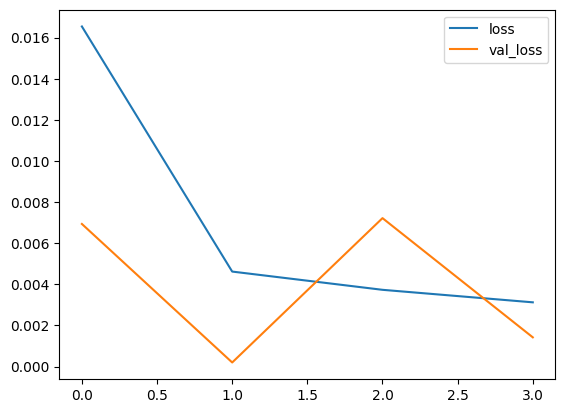

In [43]:
pd.DataFrame(seq_model.history.history).plot()

In [44]:
# CODE HERE

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [45]:
# CODE HERE

In [46]:
sc_prediction = seq_model.predict(generator)

525/525 [==============================] - 2s 3ms/step


In [47]:
prediction = scaler.inverse_transform(sc_prediction)

In [48]:
prediction.shape

(525, 1)

In [49]:
train.shape

(549, 1)

In [50]:
test_predictions =[]

In [51]:
first_eval_batch = sc_X[-time_window:]

In [52]:
first_eval_batch.reshape((1,time_window,n_features))

array([[[0.25649698],
        [0.19782873],
        [0.13318726],
        [0.24834362],
        [0.3149827 ],
        [0.41828135],
        [0.4766849 ],
        [0.45728977],
        [0.54050318],
        [0.48134479],
        [0.45575247],
        [0.35906261],
        [0.31068714],
        [0.20365141],
        [0.16432593],
        [0.2587782 ],
        [0.39071032],
        [0.44387077],
        [0.4695409 ],
        [0.41743926],
        [0.46851409],
        [0.41889656],
        [0.39641011],
        [0.28544533]]])

In [53]:
pred = seq_model.predict(first_eval_batch)

1/1 [==============================] - 0s 485ms/step


In [54]:
pred

array([[0.14891742],
       [0.12446115],
       [0.09778279],
       [0.145505  ],
       [0.17352265],
       [0.21751364],
       [0.24267706],
       [0.23429774],
       [0.270406  ],
       [0.24469362],
       [0.23363452],
       [0.19221261],
       [0.17170794],
       [0.12687813],
       [0.11059866],
       [0.14987299],
       [0.20570688],
       [0.22851351],
       [0.23958799],
       [0.21715231],
       [0.23914424],
       [0.2177776 ],
       [0.20814385],
       [0.16106838]], dtype=float32)

In [55]:
test.shape

(24, 1)

In [56]:
current_batch=first_eval_batch.reshape((1,time_window,n_features))
for i in range(len(test)):
    current_pred =seq_model.predict(current_batch)[0]

    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [57]:
current_batch

array([[[0.23900995],
        [0.20034105],
        [0.20143059],
        [0.23743962],
        [0.2871635 ],
        [0.33799714],
        [0.37862504],
        [0.40284216],
        [0.40737545],
        [0.38468194],
        [0.33903474],
        [0.2774868 ],
        [0.22040015],
        [0.18656425],
        [0.18988094],
        [0.22388285],
        [0.27033156],
        [0.31495261],
        [0.35083711],
        [0.37211365],
        [0.37659019],
        [0.35769176],
        [0.3191812 ],
        [0.26716501]]])

In [60]:
import matplotlib.pyplot as plt

In [58]:
prediction = scaler.inverse_transform(test_predictions)

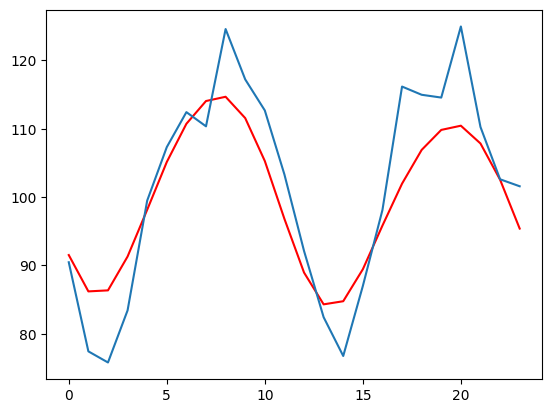

In [61]:
plt.plot(range(24), prediction,color='red')
plt.plot(range(24),test)

**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

In [ ]:
# CODE HERE

**TASK: Calculate your RMSE.**

In [ ]:
#CODE HERE